# Проверка гипотез по увеличению выручки интернет-магазина 
Заказчик этого исследования — интернет-магазин. 

**Цель исследования** - проверить гипотезы по увеличению прибыли

**Ход исследования**
Данные получим из трех датафреймов. Перед тем, как проводить анализ, проведем их предобработку. 

Далее проведем приоритизацию 9 гипотез по увеличению выручки интернет-магазина с помощью фрейворка ICE и RICE. 

Для проведения анализа нужно сформулировать нулевую гипотезу (H0) и альтернативную гипотезу (H1). Нулевая гипотеза предполагает, что между двумя переменными нет статистически значимой связи, а альтернативная гипотеза утверждает обратное. Далее для проверки гипотезы выберем статистический метод. После выбора метода рассчитываем соответствующую статистику и p-value. P-value показывает, насколько вероятно наблюдать такие или ещё более экстремальные результаты при условии, что нулевая гипотеза верна. P-value сравниваем с заданным уровнем значимости (обычно 0,05). Если p-value меньше уровня значимости, то нулевую гипотезу следует отклонить в пользу альтернативной гипотезы.

Проанализируем A/B тест на основании которого примем решение о его продолжении или остановке.

Таким образом, исследование пройдет в 4 этапа:

- обзор данных
- предобработка данных
- приоритизация гипотез
- анализ A/B теста

#### Загрузка данных

In [1]:
#загружаем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
import datetime as dt
pd.options.display.max_colwidth = 400

In [ ]:
#приведем тип данных столбца year_of_release к datetime
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year

In [2]:
#считываем csv-файл
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
#выводим информацию и первые 5 строк датафрейма
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Всего в датафрейме 9 записей, 5 столбцов**

#### Часть 1. Приоритизация гипотез

In [4]:
#применим фреймфорк ICE для приоритизации гипотез
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis.sort_values(by='ICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


**Наиболее перспективные гипотезы по ICE: 8, 0, 7**

In [5]:
#применим фреймфорк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis.sort_values(by='RICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Наиболее перспективные гипотезы по RICE: 7, 2, 0**

**При применении RICE гипотеза №7 стала самой важной, так как при ее расчете участвует показатель Reach, охват. Его показатель для гипотезы №7 - 10. Для гипотезы №8, которая после применения фреймворка ICE была самой актуальной, показатель охвата равен одному, соответственно применяя фреймворк RICE ее приоритет снижается.**

#### Часть 2. Анализ A/B теста

In [6]:
#считываем csv-файлы
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [7]:
#выводим информацию и первые 5 строк датафрейма orders
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
#переименуем столбцы
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
#проверим датафрейм orders на пропуски
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

**Пропусков нет**

In [10]:
#проверим датафрейм orders на дибликаты
orders.duplicated().sum()

0

**Дубликатов нет**

In [11]:
#выводим информацию и первые 5 строк датафрейма visitors
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
#проверим датафрейм visitors на пропуски
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

**Пропусков нет**

In [13]:
#проверим датафрейм visitors на дибликаты
visitors.duplicated().sum()

0

**Дубликатов нет**

In [14]:
#посмотрим на разбиение по группам
print('Количество посетителей в группе А: {}\n'
      'Количество посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])
print('Количество покупок в группе A: {}'.format(purchasesA))
print('Количество покупок в группе B: {}'.format(purchasesB))

Количество посетителей в группе А: 18736
Количество посетителей в группе B: 18916
Количество покупок в группе A: 557
Количество покупок в группе B: 640


**Разница в посетителях между группами 180, меньше 5% от общего числа пользователей, разбиение нормальное.**

In [15]:
#проверим группы на пересечение
a_g = orders[orders['group'] == 'A']['visitor_id']
b_g = orders[orders['group'] == 'B']['visitor_id']
orders_ab = orders.query('visitor_id in @a_g and visitor_id in @b_g')
display(orders_ab['visitor_id'].unique())
print('Количество пользователей в двух группах:', orders_ab['visitor_id'].nunique())
print('Всего пользователей в тесте:', orders['visitor_id'].nunique())

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Количество пользователей в двух группах: 58
Всего пользователей в тесте: 1031


**Одновременно в двух группах присутствуют 58 пользователей. Всего 1031 пользователь, то есть процент пересекающихся составляет 5.6%. Удалим им для дальнейшего корректного проведения теста.**

In [16]:
#удалим пересекающихся пользователей
orders = orders.query('visitor_id not in @orders_ab["visitor_id"]')
print('Всего пользователей осталось:', orders['visitor_id'].nunique())

Всего пользователей осталось: 973


In [17]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [18]:
#вычислим максимальную дату
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [19]:
#получим агрегированные кумулятивные данные по дням 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [20]:
#объединим обе таблицы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head() 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


##### График кумулятивной выручки по группам

In [21]:
#создаем датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в каждой группе
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

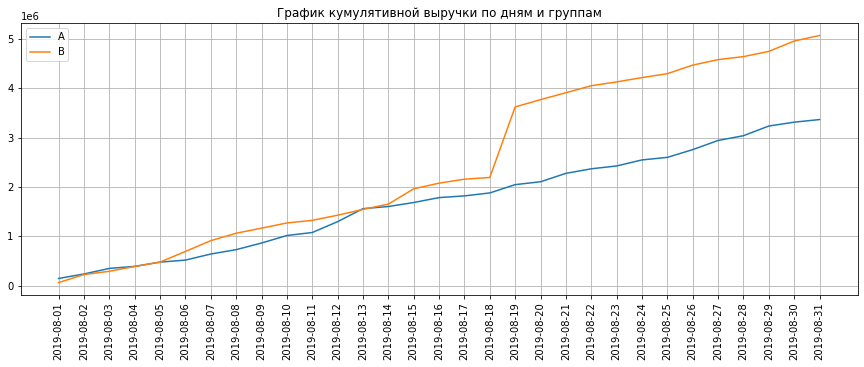

In [22]:
#построим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по дням и группам')
plt.xticks(rotation=90)
plt.grid()
plt.legend();

**Выручки практически равномерно увеличивается по группам вплоть до 14 августа. Далее выручка группы B увеличивается, а 18 августа наблюдается значительный рост. Скорее всего был крупный заказ.**

##### График кумулятивного среднего чека по группам

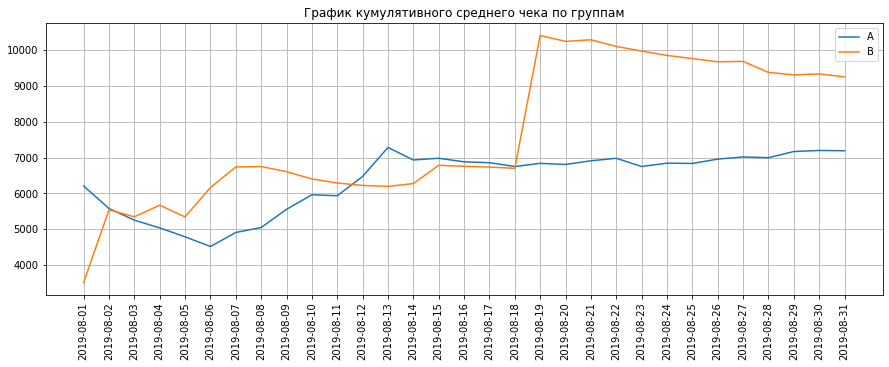

In [23]:
#построим графики среднего чека по группам
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=90)
plt.grid()
plt.legend();

**Предположения о крупном заказе 18 августа подтверждаются среним чеком, который за сутки вырос на 3т.р.**

##### График относительного изменения кумулятивного среднего чека

In [24]:
#собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

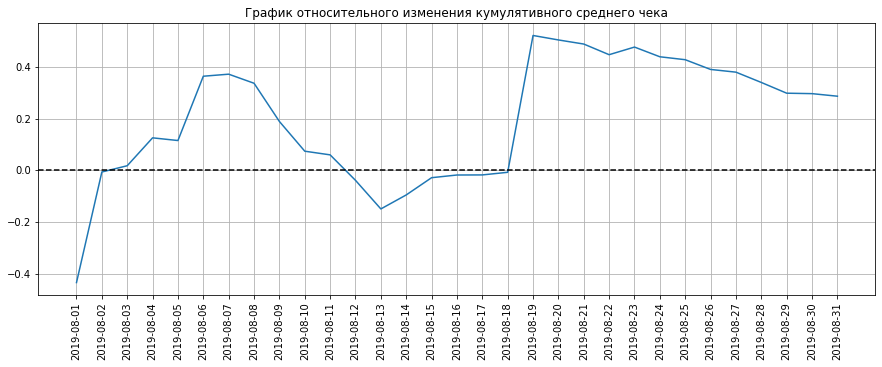

In [25]:
#построим график
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=90)
plt.grid();

**Учитывая скачки на графике, в данных явно присутствуют выбросы, от которых следует избавиться.**

##### График кумулятивного среднего количества заказов на посетителя по группам

In [26]:
#считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

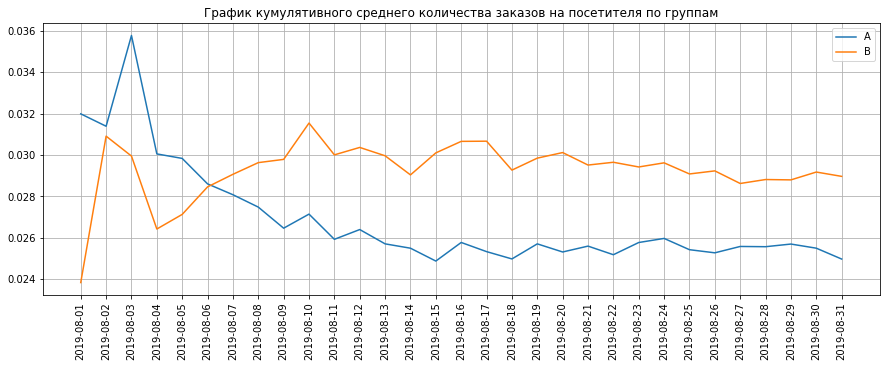

In [27]:
#построим график
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=90)
plt.grid()
plt.legend();

**После всплеска 2 августа среднее количество заказов группы A резко упало и нормализовалось только к 11 августа. Число заказов группы B начинает расти 4 августа и к 6 августа уже превышает конверсию группы A. Начиная с этого периода и до конца исследования, конверсия группы B значительно превышает аналогичный параметр группы A.**

##### График относительного изменения кумулятивного среднего количества заказов

In [28]:
#собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

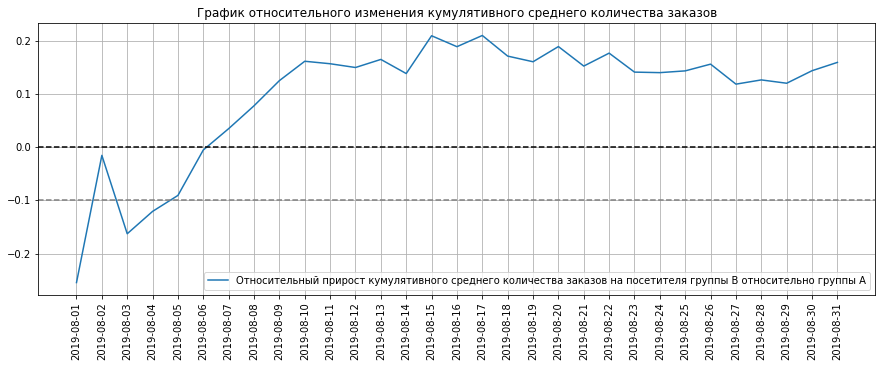

In [29]:
#построим график
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=90)
plt.grid()
plt.legend();

**Отчасти график дублирует предыдущий, 5 августа среднее количество заказов группы B начинает превосходить ту же метрику группы А. Можно сделать промежуточный вывод о том, что к 6 августа начинают работать нововведения интернет-магазина.**

##### Точечный график количества заказов по пользователям

In [30]:
#посчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


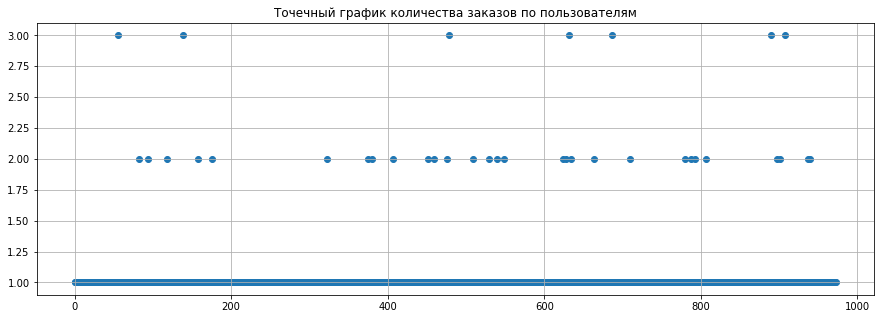

In [31]:
#построим график
plt.figure(figsize=(15,5))
plt.title('Точечный график количества заказов по пользователям')
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders']);

**Большинство пользователей совершили только один заказ. Достаточно для анализа пользователей, которые совершили 2 заказа. Данных тех, кто совершил больше двух заказов, можно отнести к выбросам. Осталось определиться с пользователями, которые совершили 3 заказа.**

##### Подсчет 95-й  99-й перцентилей количества заказов

In [32]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


**Отнесем данные пользователей, совершивших больше двух заказов к выбросам.**

##### Точечный график стоимостей заказов

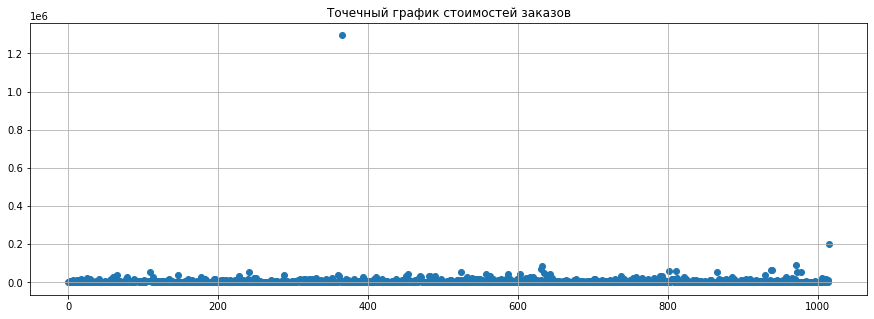

In [33]:
#построим график
plt.figure(figsize=(15,5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.grid();

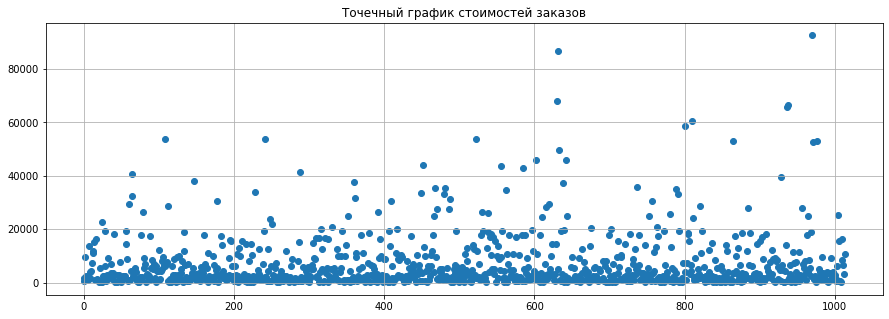

In [34]:
new_orders = orders[orders['revenue']<=200000]['revenue']
plt.figure(figsize=(15,5))
xx_values = pd.Series(range(0,len(new_orders)))
plt.scatter(xx_values, new_orders);
plt.title('Точечный график стоимостей заказов')
plt.grid();

**Подавляющее большинство совершаемых заказов укладывается в сумму 20т.р. Для определения более точного распределения посчитаем перцентили**

##### Подсчет 95-й 99-й перцентилей стоимости заказов

In [35]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


In [36]:
#посчитаем промежуточные значения между 95 и 99 перцентилем
print(np.percentile(orders['revenue'], [95, 96, 97, 98, 99])) 

[26785. 30649. 34792. 42353. 53904.]


**Установим границу в стоимости заказа 98-й перцентиль**

##### Подсчет различий в среднем количестве заказов по группам по "сырым" данным

**Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.**

In [37]:
#подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [38]:
#объединим все в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head() 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [39]:
#создадим переменные ordersByUsersA и ordersByUsersB
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [40]:
#объявим переменные sampleA и sampleB
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value равно', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Разница между A и B группой равна', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value равно 0.011
Разница между A и B группой равна 0.160


**P-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 16%**

##### Подсчет различий в среднем чеке заказа по группам по "сырым" данным

**Сформулируем гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.**

In [41]:
#произведем рассчет
print('P-value равно', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница между A и B группой равна', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value равно 0.829
Разница между A и B группой равна 0.287


**P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Разница в 28.7% между средними чека группы не является значимой с точки зрения статистики.**

##### Подсчет различий в среднем количестве заказов по группам по "очищенным" данным

**Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.**

In [42]:
#сделаем срезы пользователей с числом заказов больше 2 и дороже 42 353
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 42353]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
Name: visitor_id, dtype: int64
28


**Всего 28 аномальных пользователей.**

In [43]:
#посчитаем статистическую значимость различий
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('P-value равно', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница между A и B группой равна', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value равно 0.004
Разница между A и B группой равна 0.209


**По "очищенным данным" p-value = 0.004 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен уже 20.9%.**

##### Подсчет различий в среднем чеке заказа по группам по "очищенным" данным

**Сформулируем гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.**

In [44]:
#произведем рассчет
print(
    'P-value равно',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Разница между A и B группой равна',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value равно 0.858
Разница между A и B группой равна 0.079


**P-value значительно больше 0.05, нулевую гипотезу не отвергаем. Разница в среднем чеке после избавления от выбросов снизилась с 26% до 7.9%. Наблюдаемое различие в 7.9% не является статистически значимым.**

##### Решение по результатам теста

**По результатам исследования было выявлено**
* конверсия до и после обработки данных выше у группы B - на 16%, а затем и на 20.9% соответственно
* до обработки данных средний чек группы B был выше на 25.9%, по очищенным данным средние чеки группы практически одинаковые
* график различия конверсии между группами показывает, что результаты группы B лучше группы A

**Результаты показывают, что дальнейшее тестирование можно не продолжать и зафиксировать победу группы B над группой A. Тест "окрасился" только на половину, по числу заказов при практически идентичном среднем чеке, однако выручка все равно будет расти.**